## Monte Carlo Exercise 1 
# Lorenzo Speri and Carlo Tombolini


the feature variable $X \in [0,1]$ is a real-valued and 1-dimensional, and the response $Y \in \{0, 1\}$ 
$$p(Y=0) = p(Y=1) = 1/2$$
$$p(X = x| Y = 0) = 2 - 2x$$
$$p(X = x| Y = 1) = 2x$$

Applying the Bayes formula
$$
p(Y|X) = \frac{p(X|Y) p(Y)}{p(X)}
$$
to our likelihoods, we obtain the feature density
$$p(X) = p(X|Y=0)p(Y=0) + p(X|Y=1)p(Y=1) = 1$$
So the posteriors are
\begin{eqnarray}
p(Y=0|X) = 1-x\\
p(Y=1|X) = x \\
\end{eqnarray}

In order to find the data set we apply the following algorithm:
<br>
sample $Y \in \{0,1\}$  
<br>
find the features $x$ using the inverse transform sampling:
$$CP(x|Y) = \int_0 ^{x'} P(X=x'|Y) dx'$$
where CP is the cumulative distribution. 
If $Y = 0$
$$
CP(x|Y=0)= \int_0 ^{x'} 2-2x' dx' = 2(x-\frac{x^2}{2})
$$
If $Y = 1$
$$
CP(x|Y=1)= \int_0 ^{x'} 2x' dx' = x^2)\\
$$
So we sample $u$ from a uniform distribution $[0,1)$ in order to obtain $x$ according to the different cases $Y =0$ or $1$
$$
u \equiv CP(x|Y)
$$
For $Y = 0$ the correspondent features will be $x = 1- \sqrt{1-u}$
<br>
For $Y=1$ the correspondent features will be $x=\sqrt{u}$


In [1]:
# importing the libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
# define the size of the data set
N = 100000

In [2]:
y = np.random.randint(2, size=N)
#print(y)

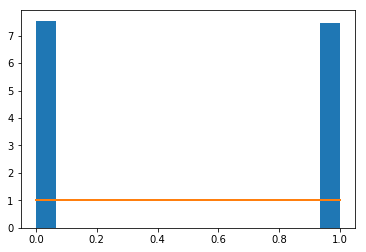

In [3]:
# plot check
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [7]:
# generate uniform distribution of u
#u = np.random.uniform(0,1,1)
# define x
x = np.array([])
# array benchmark of p(x|y=0)
x_y0 = np.array([])
# array benchmark of p(x|y=1)
x_y1 = np.array([])

# get the features x
for k in range(N):
    u = np.random.uniform(0,1,1)
    if y[k]==0:
        #all_primes = np.append(all_primes,[n])
        x = np.append(x,[1 - np.sqrt(1-u)]) 
        x_y0 = np.append(x_y0,[1 - np.sqrt(1-u)]) 
    else:
        x = np.append(x,[np.sqrt(u)])
        x_y1 = np.append(x_y1,[np.sqrt(u)])


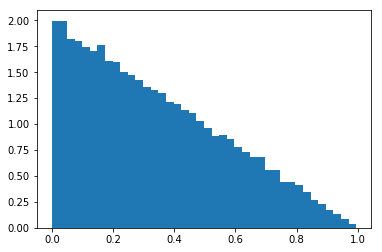

In [8]:
# check the distribution of p(x|y=0)
# plot check
count, bins, ignored = plt.hist(x_y0, 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

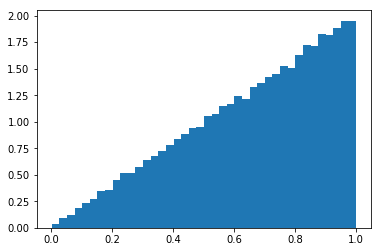

In [9]:
# check the distribution of p(x|y=1)
# plot check
count, bins, ignored = plt.hist(x_y1, 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

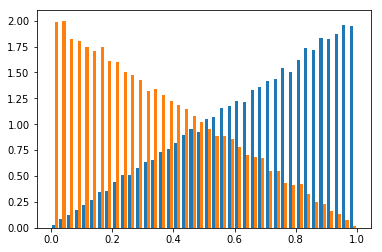

In [10]:
# plot check
count, bins, ignored = plt.hist([x_y1,x_y0], 40, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2)
plt.show()

In [14]:
# function definition
def create_data(N):
    y = np.random.randint(2, size=N)
    x = np.array([])
    # get the features x
    for k in range(N):
        u = np.random.uniform(0,1,1)
        if y[k]==0:
           #all_primes = np.append(all_primes,[n])
            x = np.append(x,[1 - np.sqrt(1-u)]) 
            #x_y0 = np.append(x_y0,[1 - np.sqrt(1-u)]) 
        else:
            x = np.append(x,[np.sqrt(u)])
            #x_y1 = np.append(x_y1,[np.sqrt(u)])
    return x, y


Exercise 1.3

In [71]:
# Data set of N = 2
N = 2
features, labels = create_data(N)

In [72]:
# Rejection sampling
sum =0
while sum != 1:
    x, y = create_data(N)
    sum = np.sum(y)
# check
print(y)

[0 1]


In [84]:
# rule A
def f(features):
    # predictions
    prediction = np.array([])
    # Define the bisector
    t = np.sum(features)/2
    print(t)
    for k in range(N):
        if features[k]<t:
            prediction = np.append(prediction,[0])
        else:
            prediction = np.append(prediction,[1])
    return prediction

y1 = f(x)
print(y1)
print(y)
    
        

0.5900766950764527
[0. 1.]
[0 1]


In [67]:
# predictions
prediction = np.array([])
print(prediction)

[]
